In [1]:
import os
import requests
import numpy as np
import pandas as pd
import time
import re
import shutil
from PIL import Image
from splinter import Browser
from bs4 import BeautifulSoup as bs
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# Mars News

In [2]:
url_mars_news = "https://mars.nasa.gov/news/?page=0&per_page=40&order=publish_date+desc%2Ccreated_at+desc&search=&category=19%2C165%2C184%2C204&blank_scope=Latest"
response = requests.get(url_mars_news)
soup = bs(response.text, 'html.parser')
# print(soup.prettify())
# results = soup.find_all('li', class_="result-row")
soup.find_all('div')
news_title = soup.find_all('div', class_="content_title")[0].text.strip()
news_p = soup.find_all('div', class_="rollover_description_inner")[0].text.strip()
print(news_title,"\n" , news_p)

Opportunity Hunkers Down During Dust Storm 
 It's the beginning of the end for the planet-encircling dust storm on Mars. But it could still be weeks, or even months, before skies are clear enough for NASA's Opportunity rover to recharge its batteries and phone home.


# JPL Mars Space Images

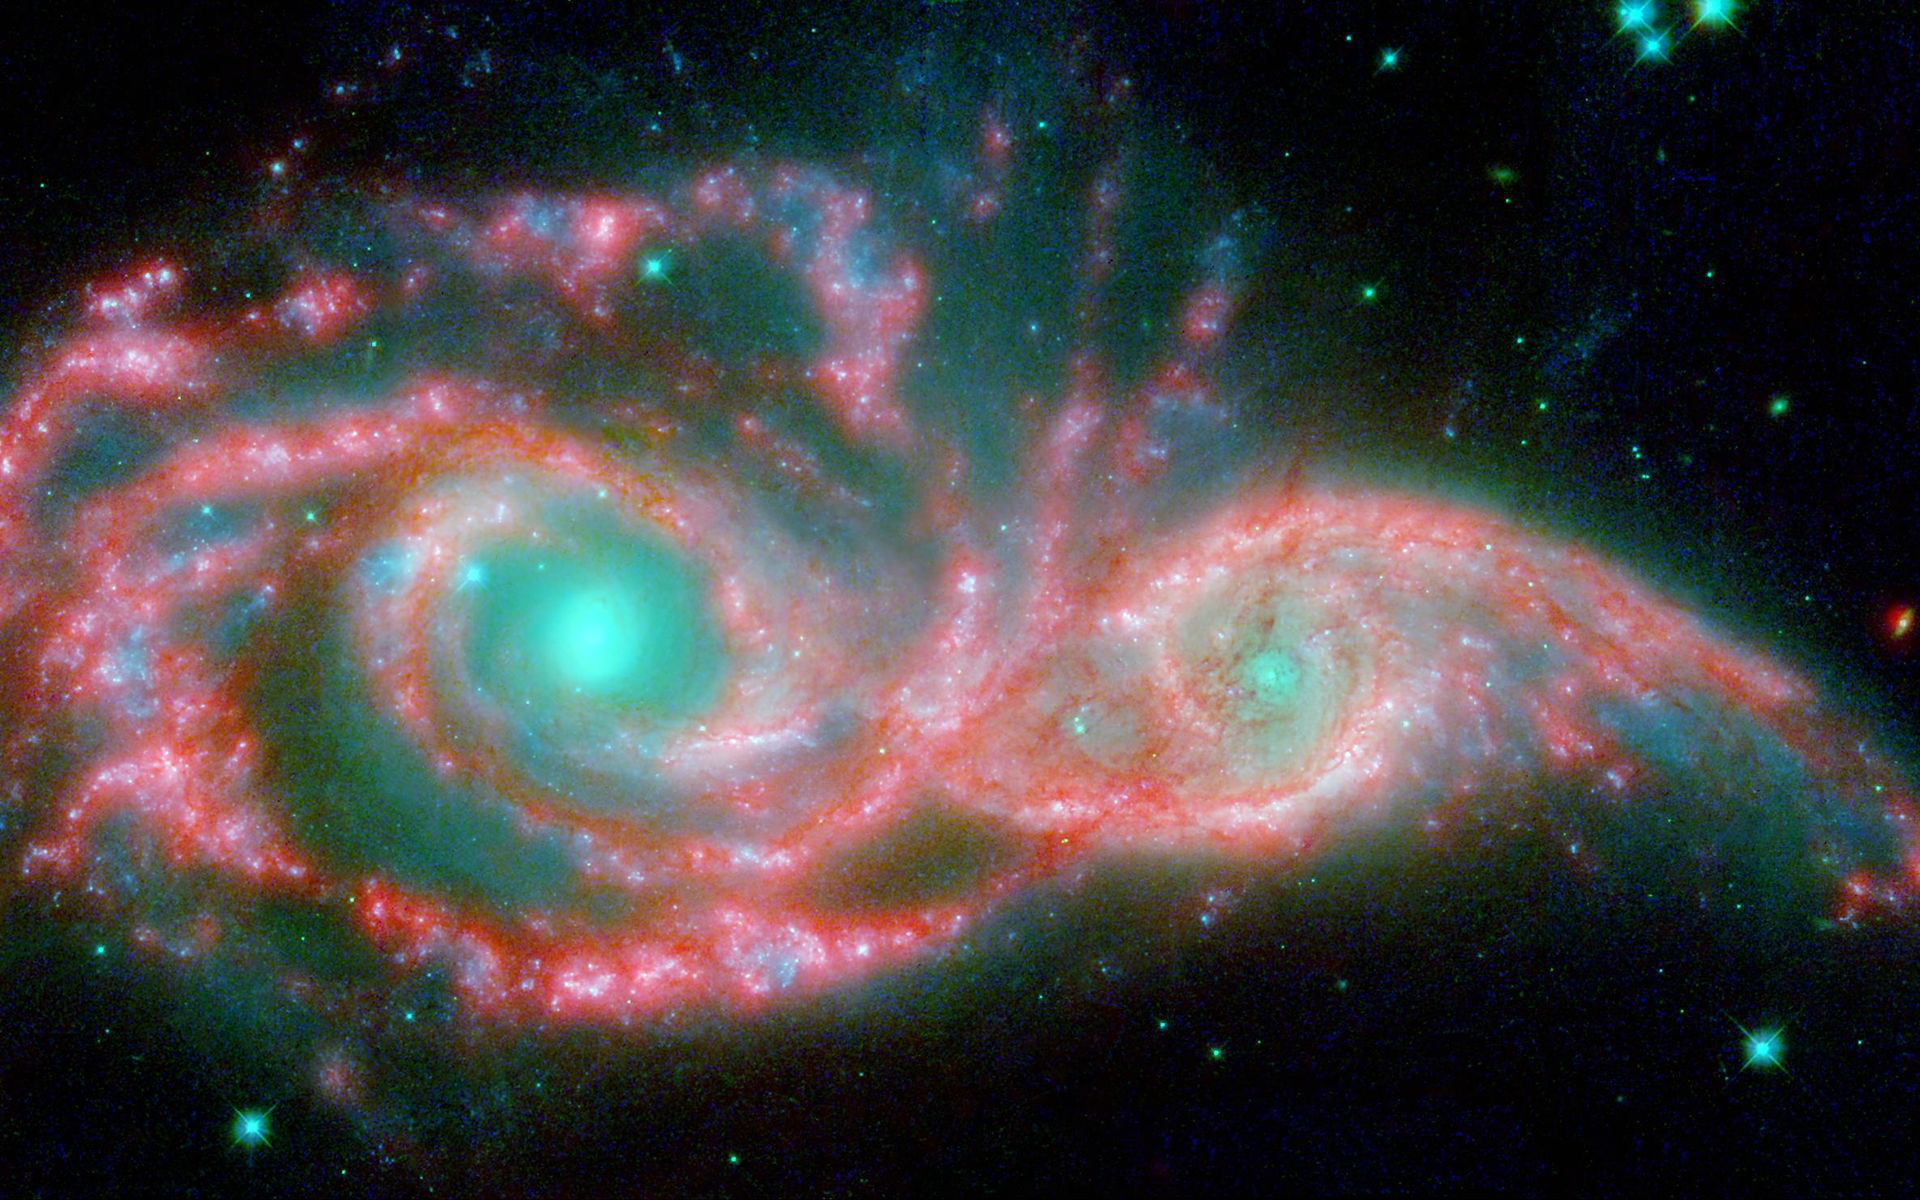

In [3]:
url_mars_space_images = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(url_mars_space_images)
html = browser.html
soup = bs(html, 'html.parser')
image = soup.find("article", class_="carousel_item")["style"]
urls = re.findall("url\((.*?)\)", image)
urls = ''.join(urls)
url_img = urls[1:-1]

featured_image_url = "https://jpl.nasa.gov" + url_img
im = Image.open(requests.get(featured_image_url, stream=True).raw)
im

# Mars Weather

In [4]:
url_mars_twitter = "https://twitter.com/marswxreport?lang=en"
browser.visit(url_mars_twitter)
html = browser.html
soup = bs(html, 'html.parser')
mars_weather = soup.find(string=re.compile("Sol"))
print(mars_weather) 

Sol 2171 (2018-09-14), high -12C/10F, low -65C/-84F, pressure at 8.79 hPa, daylight 05:43-17:59


# Mars Facts

In [5]:
url_mars_facts = "http://space-facts.com/mars/"
browser.visit(url_mars_facts)

In [6]:
df = pd.read_html(url_mars_facts)
mars_data = pd.DataFrame(df[0])
mars_data.columns = ['Mars','Info']
mars_table = mars_data.set_index("Mars").to_html(classes='marsdata').replace('\n', ' ')
mars_table

'<table border="1" class="dataframe marsdata">   <thead>     <tr style="text-align: right;">       <th></th>       <th>Info</th>     </tr>     <tr>       <th>Mars</th>       <th></th>     </tr>   </thead>   <tbody>     <tr>       <th>Equatorial Diameter:</th>       <td>6,792 km</td>     </tr>     <tr>       <th>Polar Diameter:</th>       <td>6,752 km</td>     </tr>     <tr>       <th>Mass:</th>       <td>6.42 x 10^23 kg (10.7% Earth)</td>     </tr>     <tr>       <th>Moons:</th>       <td>2 (Phobos &amp; Deimos)</td>     </tr>     <tr>       <th>Orbit Distance:</th>       <td>227,943,824 km (1.52 AU)</td>     </tr>     <tr>       <th>Orbit Period:</th>       <td>687 days (1.9 years)</td>     </tr>     <tr>       <th>Surface Temperature:</th>       <td>-153 to 20 °C</td>     </tr>     <tr>       <th>First Record:</th>       <td>2nd millennium BC</td>     </tr>     <tr>       <th>Recorded By:</th>       <td>Egyptian astronomers</td>     </tr>   </tbody> </table>'

# Mars Hemispheres

In [7]:
url_mars_hemi = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(url_mars_hemi)

In [8]:
hemisphere_image_urls = []
for i in range (4):
    time.sleep(3)
    images = browser.find_by_tag('h3')
    images[i].click()
    html = browser.html
    soup = bs(html, 'html.parser')
    partial = soup.find("img", class_="wide-image")["src"]
    img_title = soup.find("h2",class_="title").text
    img_url = 'https://astrogeology.usgs.gov'+ partial
    hemi_data = {"title":img_title,"img_url":img_url}
    hemisphere_image_urls.append(hemi_data)
    browser.back()

In [30]:
hemisphere_image_urls

[{'title': 'Cerberus Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/3cdd1cbf5e0813bba925c9030d13b62e_schiaparelli_enhanced.tif_full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/ae209b4e408bb6c3e67b6af38168cf28_syrtis_major_enhanced.tif_full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/7cf2da4bf549ed01c17f206327be4db7_valles_marineris_enhanced.tif_full.jpg'}]